# **<a>Lab_1**
**Name :** Karim Gamal Mahmoud Mohamed

**ID : 21kgmm**

# <a>Airbnb - motion graphic by Dribbble

> ![](https://i.pinimg.com/originals/38/6b/48/386b48eec5ff4554ac60d8eda68cc02f.gif)


> [source](https://www.pinterest.com/pin/570479477778722865/)

# <a>Data Cleaning Practices

In this lab, we will apply learned concepts from Day 1-2 lectures to perform data cleaning on a given Airbnb data set. 

This dataset `(raw.csv)` contains 30k+ records on hotels in the top-10 tourist destinations and major US metropolitan areas sraped from Airbnb.com. 
Each data record has 40 attributes including the number of bedrooms, price, location, etc. 
The attribute "pop2016" means population of the zipcode location (area) in year 2016.
Demographic and economic attributes were scraped from city-data.com. 

Updated: short description for attributes:

## House specific features, collected from Airbnb.com:
- `Bathrooms`: The number of bathrooms in the listing
- `Bedrooms`: The number of bedrooms
- `Beds`: The number of bed(s)
- `LocationName`: Location of the house
- `NumGuests`: Maximum number of guests can hold
- `NumReviews`: number of reviews received
- `Price`: daily price in local currency
-`Rating`: **Y/N - whether the rating of each house is 5 or not**
- `latitude`: location information latitude
- `longitude`: location information longitude
- `zipcode`: zipcode of the house

## demographic and economic attributes based on zipcode, collected from city-data.com (means the same zipcode should share the same value for each of the following attributes)
- `pop2016`: popularity of the area reported in 2016
- `pop2010`: popularity of the area reported in 2010
- `pop2000`: popularity of the area reported in 2000
- `cost_living_index`: a U.S standarded index for cost living measurement
- `land_area`: space of land
- `water_area`: space of water area
- `pop_density`: density of population 
- `number of males`: within the area population
- `number of females`: within the area population
- `prop taxes paid 2016`: Median real estate property taxes paid for housing units in 2016
- `median taxes`: median of taxes paid by house owners in the area
- `median house value`: median of house value in the area
- `median household income`: median of income of house owners in the area
- `median monthly onwer costs (with mortgage)`: median monthly cost of house owner including mortgage
- `median monthly onwer costs (no mortgage)`: median monthly cost of house owner without considering mortgage
- `median gross rent`: the monthly rent agreed or contracted for plus the estimated monthly cost of utilities and fuels.
- `median asking price for vacant for-sale home/condo`: median asking price for for-sale home in the area
- `unemployment`: umemployment ratio of the area

## aggregated features for Abnb by zipcode 
- `Number of Homes	Count of Abnb`:	number of Abnb houses in this area
- `Density of Abnb (%)`: ratio of Abnb houses in this area
- `Average Abnb Price (by zipcode)`: aggregated by zipcode
- `Average NumReviews (by zipcode)`: aggregated by zipcode	
- `Average Rating (by zipcode)`: aggregated by zipcode
- `Average Number of Bathrooms (by zipcode)`: aggregated by zipcode
- `Average Number of Bedrooms (by zipcode)`: aggregated by zipcode
- `Average Number of Beds (by zipcode)`: aggregated by zipcode
- `Average Number of Guests (by zipcode)`: aggregated by zipcode



The prediction label is Rating of house.

## Submission: submit via onq. 


# <a>Step 1:</a> Import needed libraries. E.g., `pandas`, `missingno`, and `sklearn`

In [1]:
# import libraries
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

# to load the data from my Google Drive
from google.colab import drive

# <a>Task 1:</a> Read dataset and perform basic data exploration. Specially, you should write code to explore the types of data provided

In [2]:
# drive path.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# TODO for Task 1, put your code here to perform data type and data scale check
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DEBI/Queens/DA/Lab_1/raw.csv")

# check the first five rows of the training data
df.head()

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,1.0,1.0,Atlanta,2.0,7.0,38.0,Y,33.75515,-84.32992,...,5306.0,75,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1,1.0,1.0,1.0,Atlanta,2.0,15.0,38.0,N,33.82613,-84.33963,...,10537.2,96,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
2,2.0,2.0,2.0,Atlanta,4.0,17.0,100.0,Y,33.75076,-84.37058,...,9114.4,200,2.194330,119.368687,40.400000,4.937500,1.375000,1.602094,1.925000,1.925000
3,1.0,1.0,1.0,Atlanta,2.0,304.0,78.0,Y,33.77059,-84.33538,...,7808.0,130,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,Atlanta,2.0,19.0,50.0,Y,33.79030,-84.40027,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421


> If we want to see what all the data types are in a dataframe, use `df.dtypes` or  the `df.info()` function shows even more useful info.

In [4]:
# summary of the data including non-null counts

# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33145 entries, 0 to 33144
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bathrooms                                           32697 non-null  float64
 1   Bedrooms                                            29818 non-null  float64
 2   Beds                                                32831 non-null  float64
 3   LocationName                                        32826 non-null  object 
 4   NumGuests                                           32831 non-null  float64
 5   NumReviews                                          32829 non-null  float64
 6   Price                                               32507 non-null  float64
 7   Rating                                              33145 non-null  object 
 8   latitude                                            33145 non-null  float64


> **Notes on the previous cell** : 

> After looking at the automatically assigned data types, the types of data are `float` , `int` and `object`

# <a>Task 2:</a> Data quality check, 

> - Does duplicate entries exist in this table? 

> - Do they have consistent values ? 
> Note: (consistent means duplicate records have same values for all attribute) 

> - Briefely explain your methodology and your findings within this markdown cell, and write corresponding code in the next code cell.


> **Notes on task_2** : 

>Through my use of `duplicated()` function with **Parameter** : `subset=None` to consider all attributes for identifying duplicates and to remove those duplicates have been used `drop_duplicates()` function.

In [5]:
# TODO for Task 2
# any duplicate records?
# use the DataFrame.duplicated() method to return a series of boolean values
df.duplicated(subset=None)

0        False
1        False
2        False
3        False
4        False
         ...  
33140    False
33141    False
33142    False
33143    False
33144    False
Length: 33145, dtype: bool

> **Notes on the previous cell** : 

> Because of the large amount of data, we cannot determine whether there is duplicates or not, so we need to use `unique()` or `sum()`

In [6]:
df.duplicated().unique() #returns a list of unique values

array([False,  True])

> We need to drop any duplicates ignoring the misleading of the machine learning model.

In [7]:
# dropping ALL duplicate values
df = df.drop_duplicates()

In [8]:
# To make sure everything is working fine.
df.duplicated().sum()

0

# <a>Task 3:</a> Data quality check, write code and answer:

- 3.1 Does missing value exist in the table? 
- 3.2 Where are the missing data? 
- 3.3 How much data is missing?
- 3.4 Are there any variables often missing together？

> You can use missingno library to generate plots to support your claim. 

>Summarize your findings for task 3 in this markdown cell and write corresponding code in the next code cell.



> **Notes on task_3** : 

> We found missing values  in `Bedrooms` column. 

> To determine where the missing values are detected in the whole data, we used `msno.matrix(df)` function and an equation to calculate the ratio of missing values .

> Finally, to determine if there are any variables that are often missing together like (`Bathrooms` ,`Beds` ,`LocationName` ,`NumGuests` and `NumReviews` variables often missing together with `price`) we used `msno.heatmap(df)` funciton.

> ## <a>3.1 Does missing value exist in the table? yes

> Findings: there are missing values, exist for just one attribute.

In [9]:
# TODO for Task 3
# you can easily find the records containing missing values for just one column
df[df['Bedrooms'].isnull()]

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
9,1.0,NaN,2.0,Atlanta,5.0,117.0,150.0,Y,33.76864,-84.36000,...,9066.8,112,1.235276,138.459460,29.600000,4.872093,1.339286,1.704082,1.982143,1.982143
10,1.0,NaN,1.0,Atlanta,2.0,65.0,65.0,N,33.77357,-84.38437,...,6912.0,210,3.038194,141.428571,36.273292,4.880795,1.285714,1.494681,1.933333,1.933333
13,1.0,NaN,1.0,Atlanta,2.0,17.0,65.0,Y,33.79078,-84.33979,...,9066.8,112,1.235276,138.459460,29.600000,4.872093,1.339286,1.704082,1.982143,1.982143
34,1.0,NaN,1.0,Atlanta,2.0,12.0,115.0,N,33.77620,-84.35903,...,9066.8,112,1.235276,138.459460,29.600000,4.872093,1.339286,1.704082,1.982143,1.982143
36,1.0,NaN,2.0,Atlanta,2.0,86.0,80.0,Y,33.78380,-84.39761,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,1.0,NaN,1.0,Washington,2.0,39.0,76.0,Y,38.87337,-77.01798,...,27.6,27,97.826087,106.148148,61.391304,4.727273,1.074074,1.461538,1.666667,1.666667
33098,1.0,NaN,1.0,Washington,3.0,6.0,91.0,Y,38.87965,-76.99003,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33101,1.0,NaN,1.0,Washington,3.0,185.0,125.0,Y,38.87986,-76.99554,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33106,1.0,NaN,1.0,Washington,2.0,47.0,149.0,Y,38.91057,-77.02866,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252


> You can easily find the records containing missing values for all columns

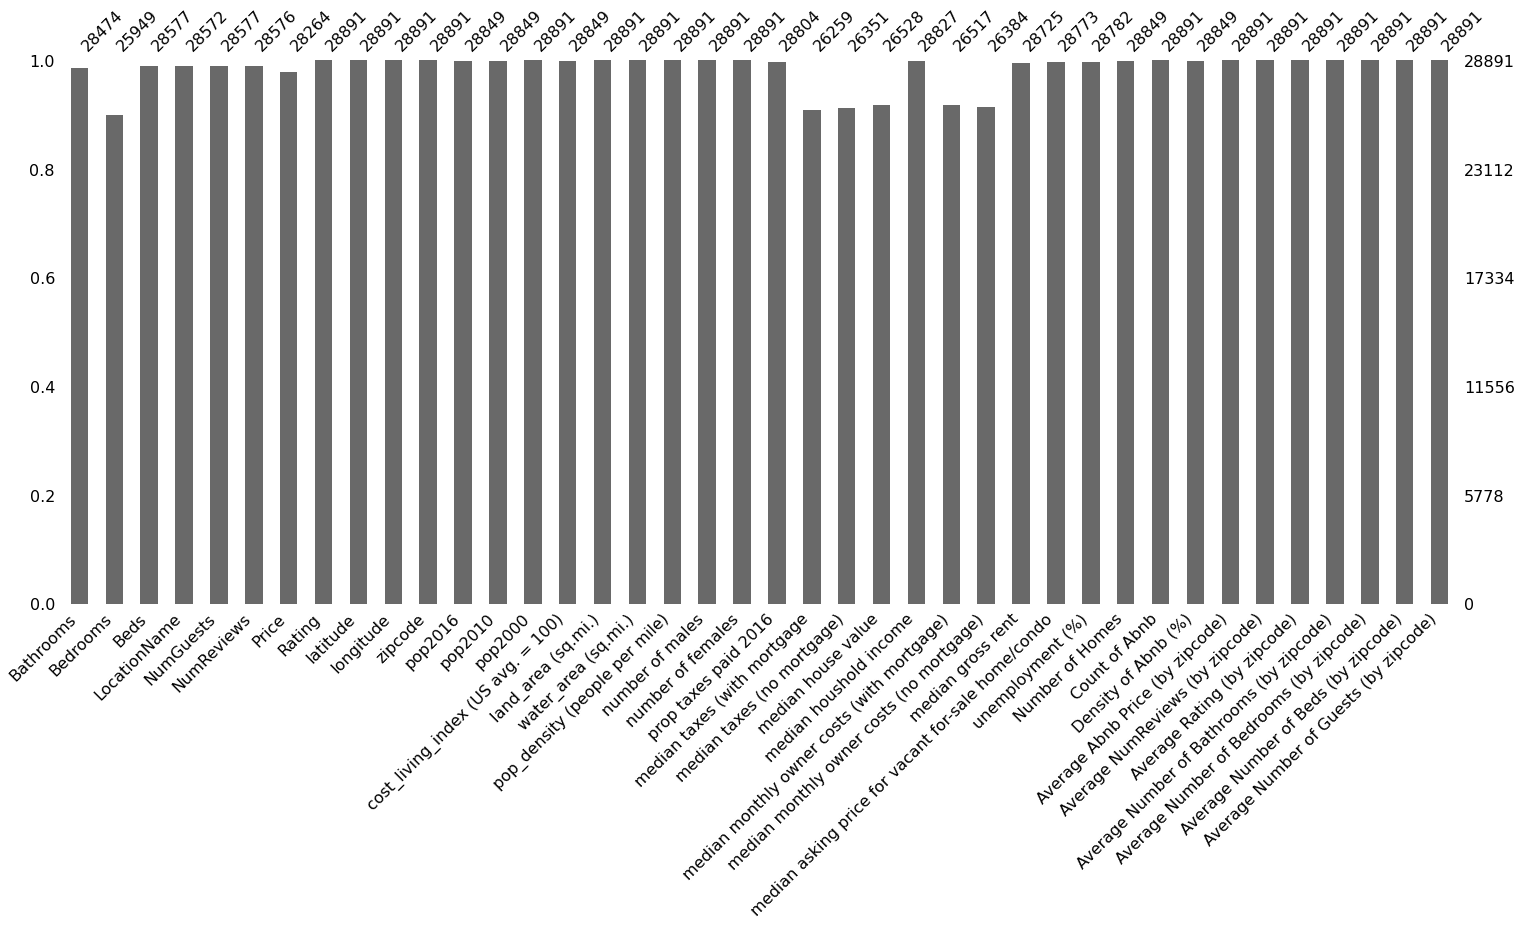

In [10]:
#bar chart
msno.bar(df)

> The bar chart above gives a quick graphical overview of the completeness of the dataset. We can see that `Bathrooms`, `median taxes (with mortage)` ,`median taxes (no mortage)`, `median house value` ,`median monthly owner costs (with mortage)` and `median monthly owner costs (no mortage)` columns have missing values. Next,it would make sense to find out the locations of the missing data.

> But it is better to get the percentage of missing values for each column because it is more accurate.

> ## <a>3.2 Where are the missing data?

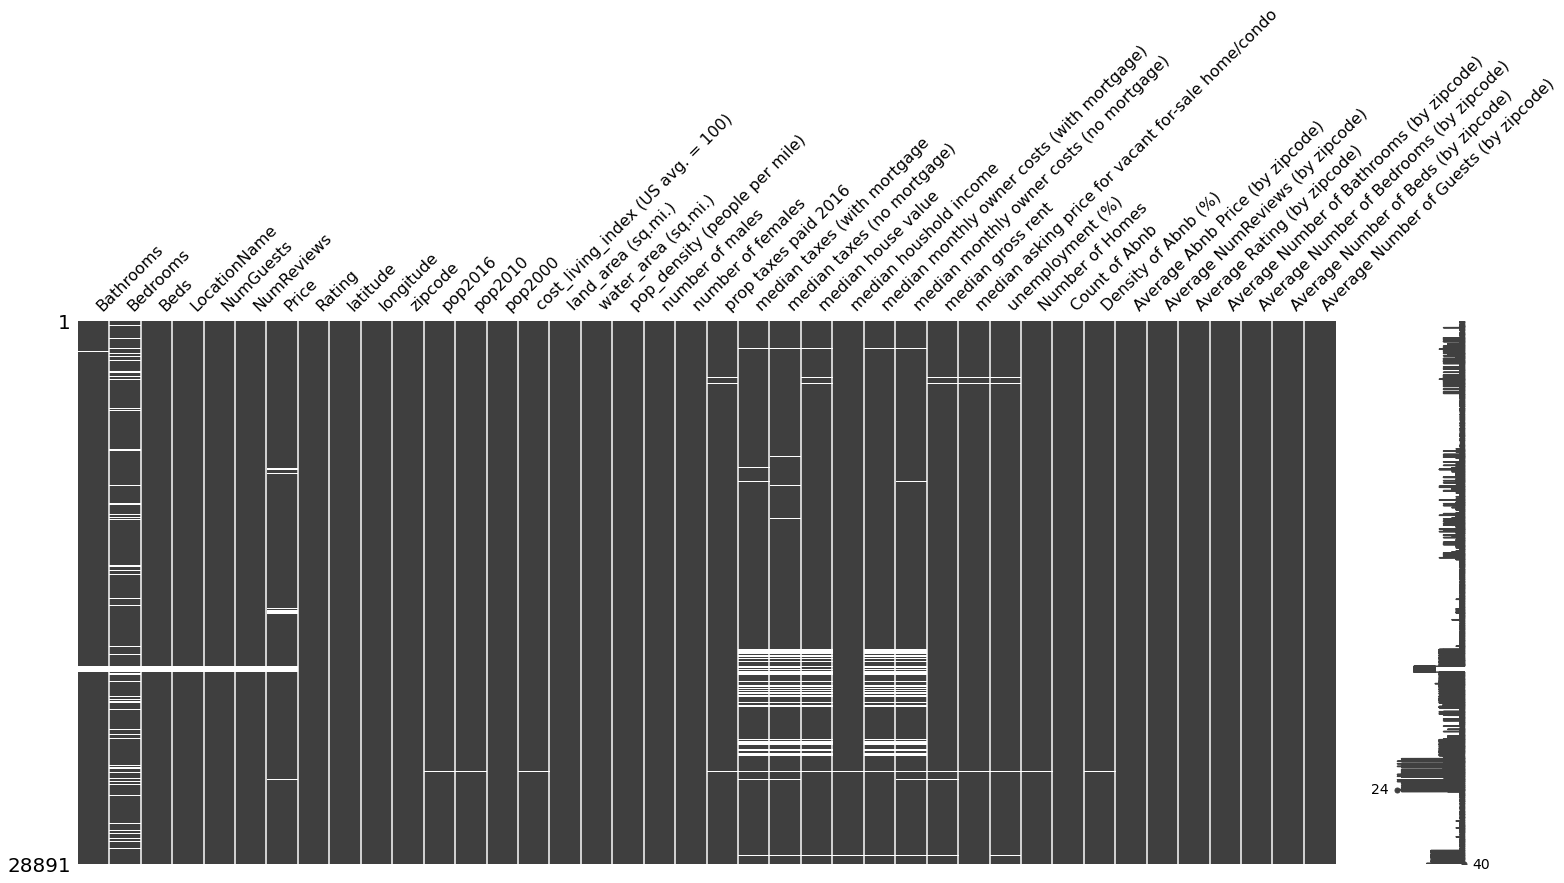

In [11]:
#visualize missing values as a matrix
msno.matrix(df)

> ## <a>3.3 How much data is missing?

>

In [12]:
# we will call this method several time 
def ratio_meth():
  # you can also count the ratio of missing values
  total_miss = df.isnull().sum()
  # Percentage of missing values
  percent_miss = (total_miss/df.isnull().count()*100)

  # sort attributes by missing value ratio
  missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
  print(missing_data.sort_values(by='Total missing',ascending=False))

ratio_meth()

                                                    Total missing  % missing
Bedrooms                                                     2942  10.183102
median taxes (with mortgage                                  2632   9.110103
median taxes (no mortgage)                                   2540   8.791665
median monthly owner costs (no mortgage)                     2507   8.677443
median monthly owner costs (with mortgage)                   2374   8.217092
median house value                                           2363   8.179018
Price                                                         627   2.170226
Bathrooms                                                     417   1.443356
LocationName                                                  319   1.104150
NumReviews                                                    315   1.090305
Beds                                                          314   1.086844
NumGuests                                                     314   1.086844

> ## <a>3.4 Are there any variables often missing together？

> Yes, there are. Like : 

> `median taxes (with mortage)` ,`median taxes (no mortage)` and `median house value` variables often missing together with `median monthly owner costs (with mortage)` and ` median monthly owner costs (no mortage)`

> `unemployment (%)` , `Number of Homes` and `Density of Abnb (%)` variables often missing together with  `median houshold income`

> `Bathrooms` ,`Beds` ,`LocationName` ,`NumGuests` and `NumReviews` variables often missing together with  `price`



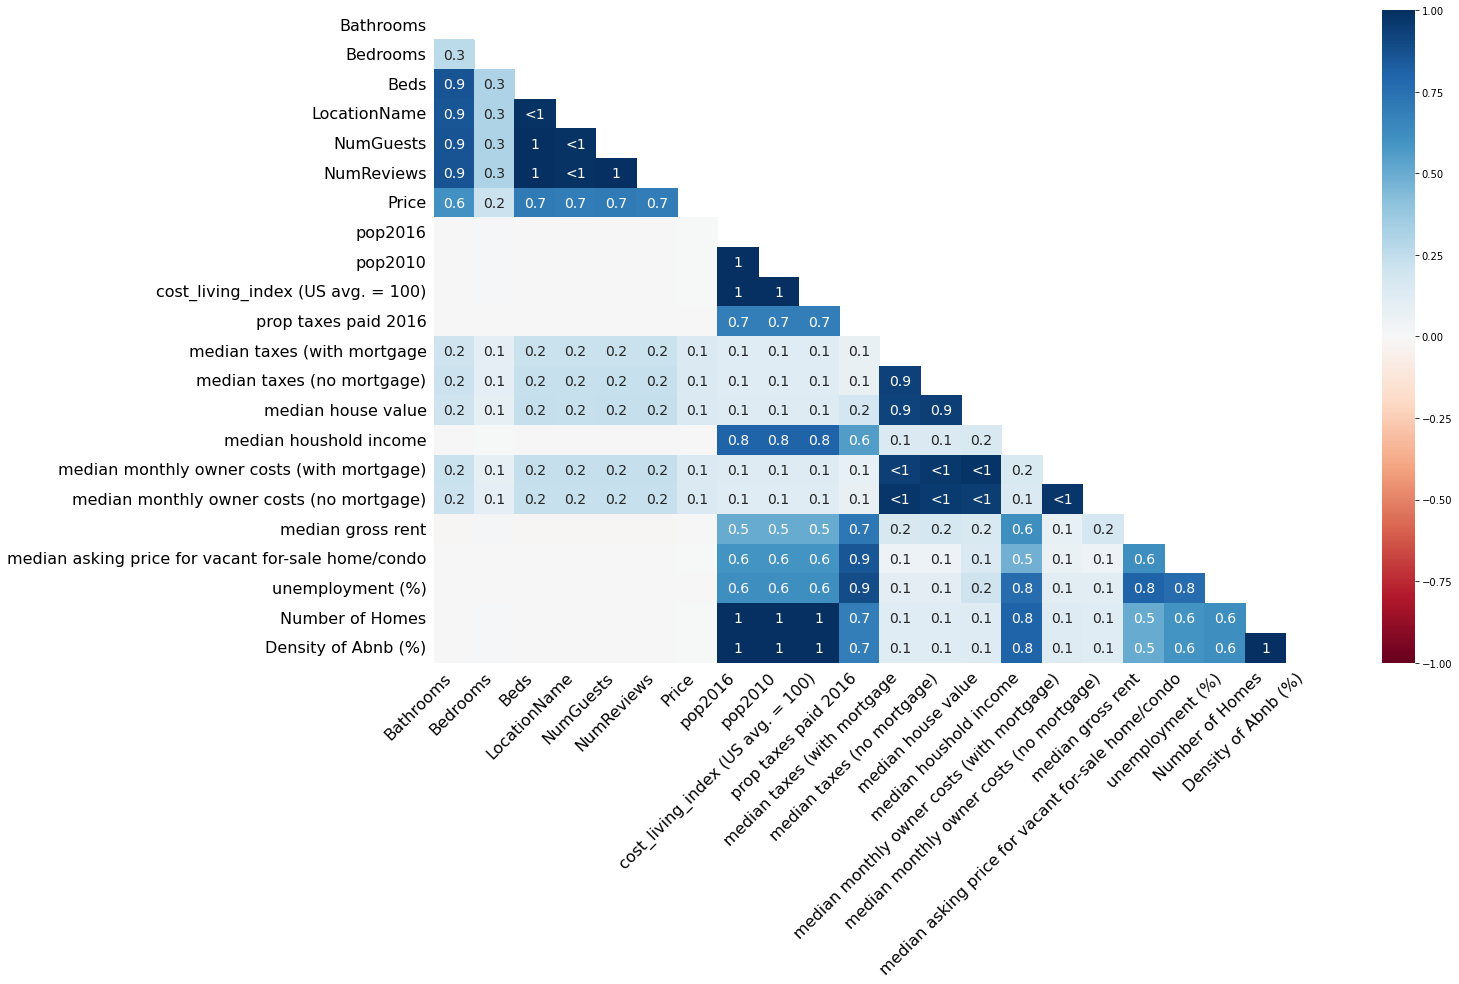

In [13]:
#heapmap for correlation analysis
msno.heatmap(df)

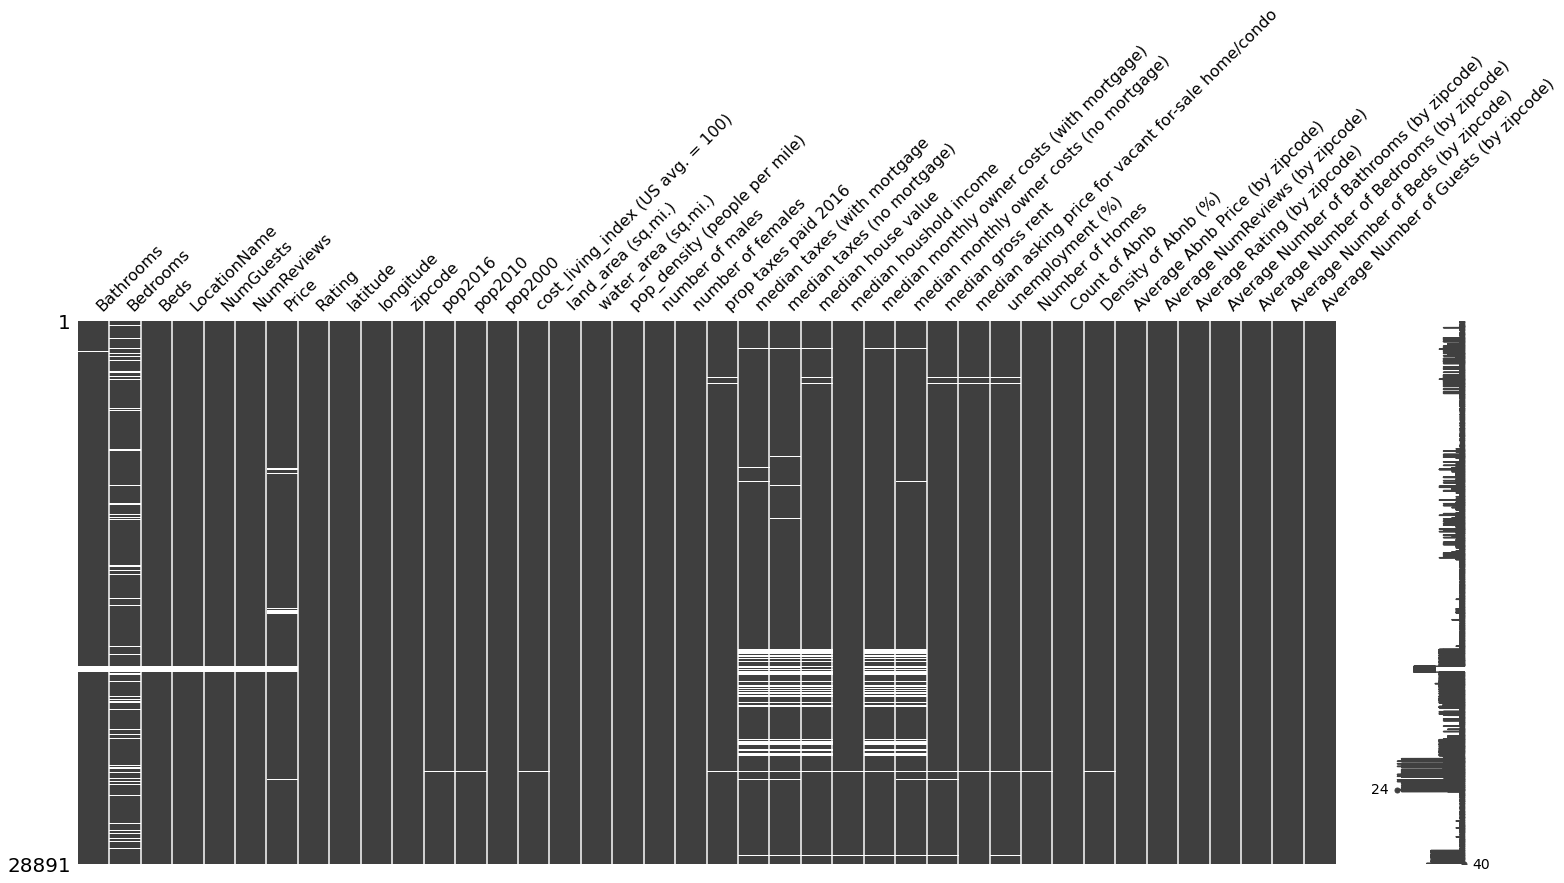

In [14]:
#visualize missing values as a matrix
msno.matrix(df)

# <a>Task 4:</a>

> What are the potential mechnisms of the missing values?

> Briefely explain your methodology and your findings (within this markdown cell), and write corresponding code in the next code cell.

## The potential mechnisms of the missing values :

> Before we start treating the missing values ,it is important to understand the various reasons for the missingness in data. Broadly speaking, there can be three possible reasons:

> ![](https://cjasn.asnjournals.org/content/clinjasn/early/2014/02/06/CJN.10141013/F2.large.jpg?width=800&height=600&carousel=1)

> [source](https://cjasn.asnjournals.org/content/early/2014/02/06/CJN.10141013/tab-figures-data?versioned=true)



1.   **Missing Completely at Random (MCAR)**:
> The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

 > like `Bedrooms` column in our data , this column has no pattern , the missingness in bedrooms columns can be attributed as missing completely at random.
 
 > If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

 > But `Bedrooms` column has ~ `10%` missing values only . So, that column must have useful data.

2.   **Missing at Random (MAR)**:
> MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

3.   **Missing Not at Random (MNAR)**:
> Missingness depends on unobserved data or the value of the missing data itself.

> Advanced Imputation Techniques: 



*   Advanced imputation techniques uses machine learning algorithms to impute the missing values in a dataset unlike the previous techniques where we used other column values to predict the missing values. We shall look at the following two techniques in this notebook:
  1.   Nearest neighbors imputation
     *   The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.
  2.   Multivariate feature imputation
      *  We described it in Task 5




> [source](https://en.wikipedia.org/wiki/Missing_data)

In [15]:
# TODO for Task 4
# No code to write in this cell.

# <a>Task 5:</a> 

>Handling missing values, Briefely explain your methodology below (within this markdown cell), and write corresponding code in the next code cell.

>**Note :** we need to handle the `Bedrooms` column with simple imputer class because it is very clear to see from `msno.matrix()` that it is of the type (MCAR) mechanism.

> We need to use the label encoder in orrder to convert categorical data into numeric values.
> And also we needed a LabelEncoder that keeps my missing values as 'NaN' to use an Imputer afterwards.

In [16]:
# TODO for Task 5

# source : https://stackoverflow.com/questions/64900801/implementing-knn-imputation-on-categorical-variables-in-an-sklearn-pipeline
# source : https://stackoverflow.com/questions/54444260/labelencoder-that-keeps-missing-values-as-nan?noredirect=1&lq=1

df = df.apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index))

# create an object from SimpleImputer class with  strategy='mean'
simple_ = SimpleImputer(strategy='mean')
# impute dataFrame
df['Bedrooms'] = simple_.fit_transform(df[['Bedrooms']])

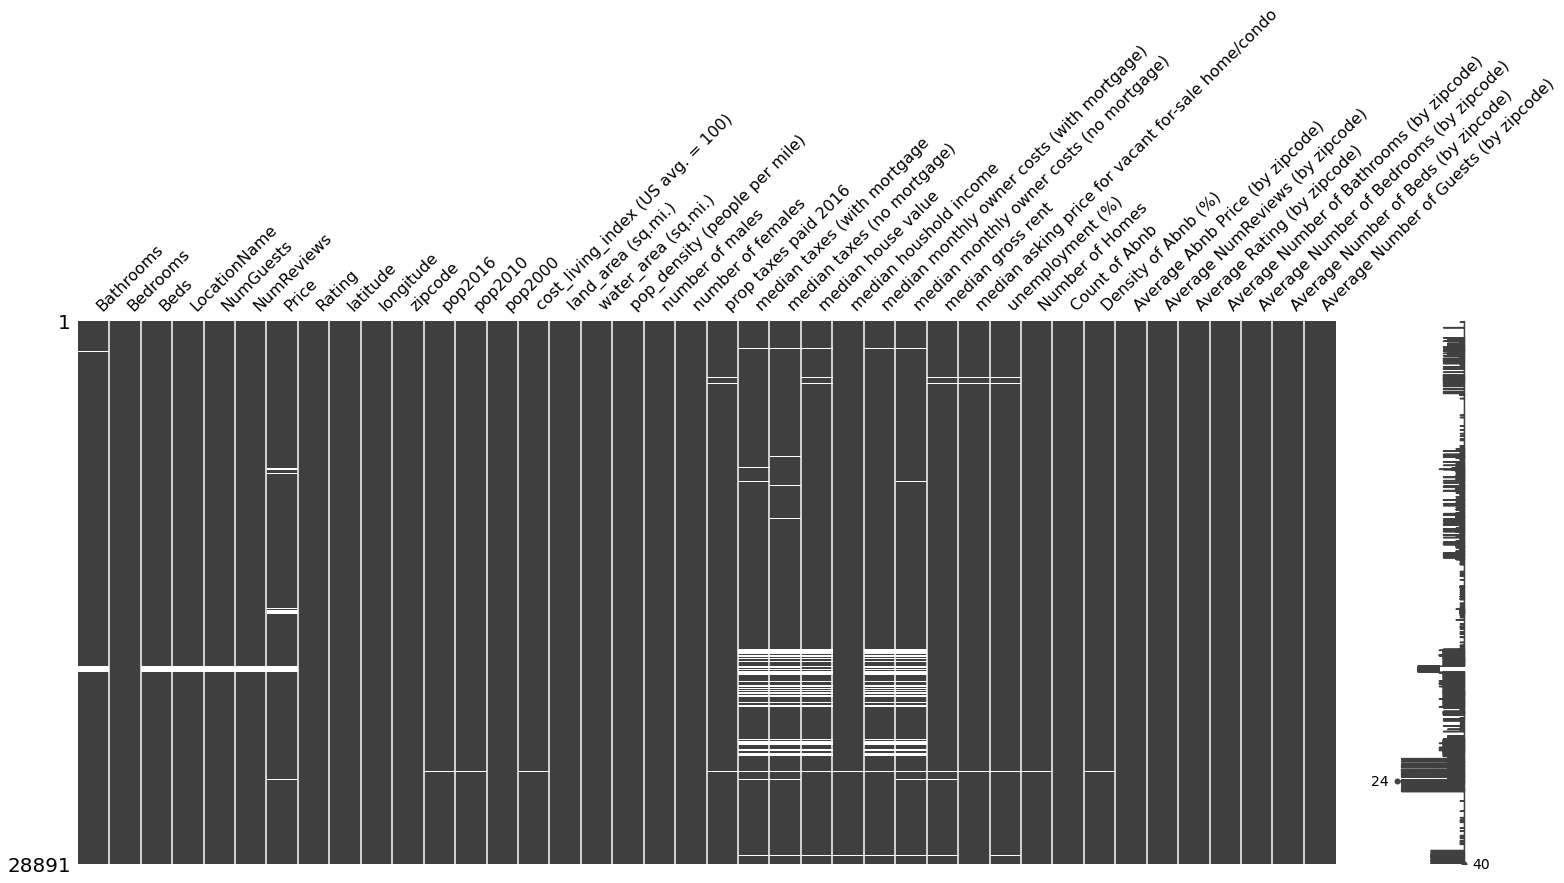

In [17]:
#visualize missing values as a matrix
msno.matrix(df)

> **Notes on the previous cell** : 

> As we can see there are no missing values in the `Bedrooms` column.

> ### As we know Missing not at random occurs when The pattern of missingness is related to other variables in the dataset, but in addition, the values of the missing data are not random.

> For example, when smoking status is not recorded in patients admitted as an emergency, who are also more likely to have worse outcomes from surgery.

> Missing not at random data are important, can alter your conclusions, and are the most difficult to diagnose and handle. They can only be detected by collecting and examining some of the missing data. This is often difficult or impossible to do.

> `median taxes (with mortage)` ,`median taxes (no mortage)` and `median house value` variables often missing together with `median monthly owner costs (with mortage)` and ` median monthly owner costs (no mortage)` column

> And also `Bathrooms` ,`Beds` ,`LocationName` ,`NumGuests` and `NumReviews` variables often missing together with  `price` column

> So, we need to handle them .


> ### **Multivariate feature imputation - Multivariate imputation by chained equations (MICE)**

> A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value. In sklearn, it is implemented as follows:

In [18]:
# source : https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
# source : https://amueller.github.io/aml/01-ml-workflow/08-imputation.html
# source : https://stackoverflow.com/questions/57154209/implementation-of-sklearn-impute-iterativeimputer

# create a list with columns names .
col_names = ['median taxes (with mortgage', 'median taxes (no mortgage)', 'median house value', 'median monthly owner costs (no mortgage)', 'median monthly owner costs (with mortgage)']

# Use IterativeImputer to predict missing values.
imputer = IterativeImputer(max_iter=10)
# Fit to data, then transform it.
df[col_names] = imputer.fit_transform(df[col_names])


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


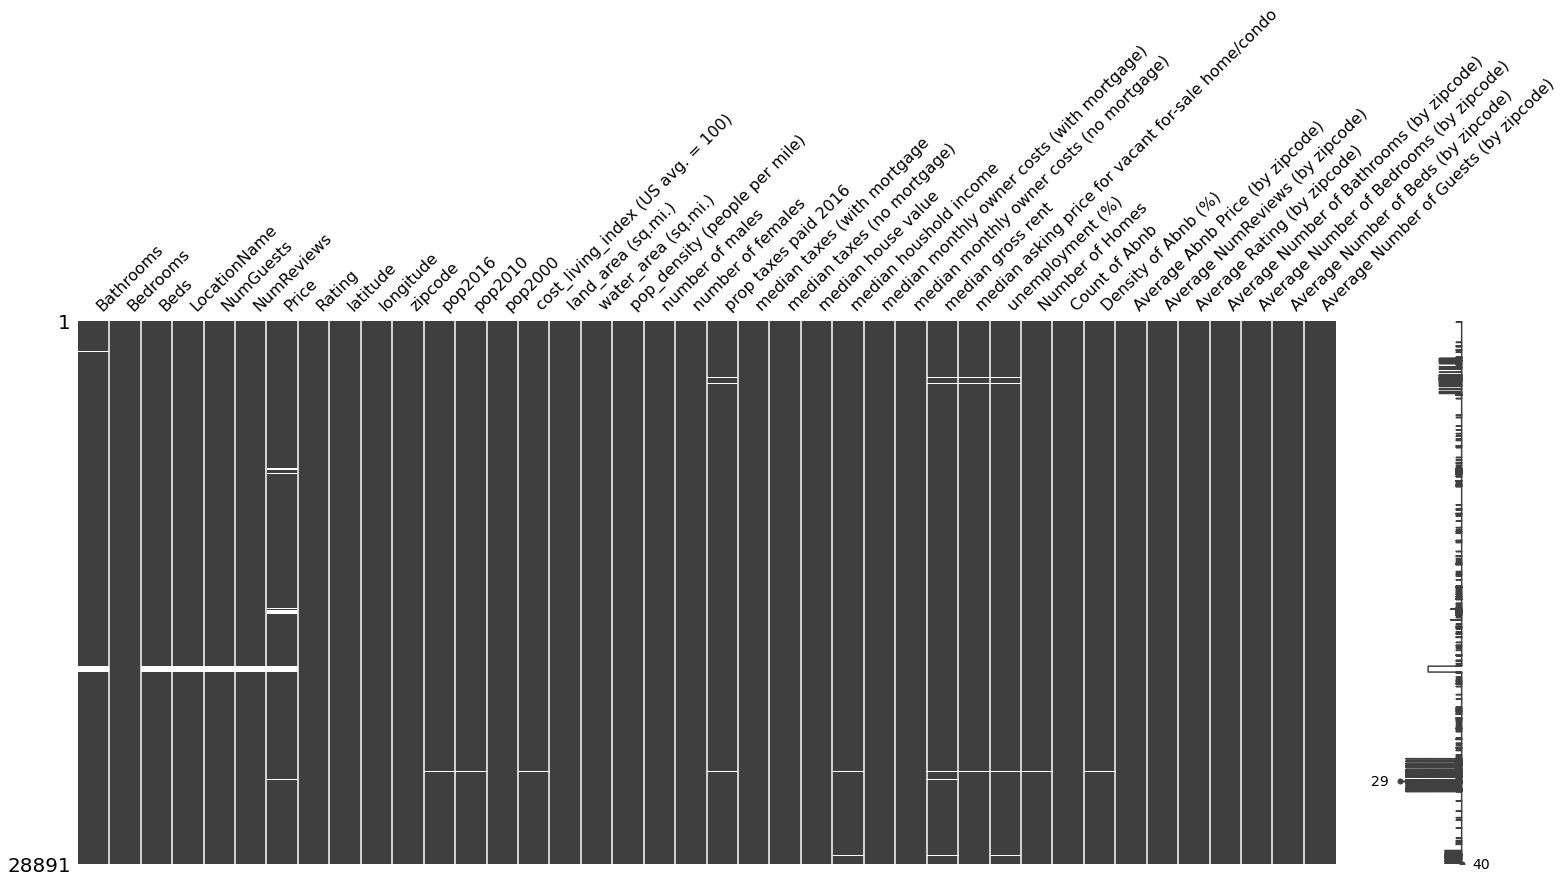

In [19]:
# To make sure everything is working fine.
#visualize missing values as a matrix
msno.matrix(df)

> **Notes on the previous cell** : 

> As we can see there are no missing values in the `median taxes (with mortage)` ,`median taxes (no mortage)` , `median house value` , `median monthly owner costs (with mortage)` and ` median monthly owner costs (no mortage)` columns



In [20]:
# create a list with columns names .
col_names = ['Bathrooms', 'Beds', 'LocationName', 'NumGuests', 'NumReviews', 'Price']

# Fit to data, then transform it.
df[col_names] = imputer.fit_transform(df[col_names])

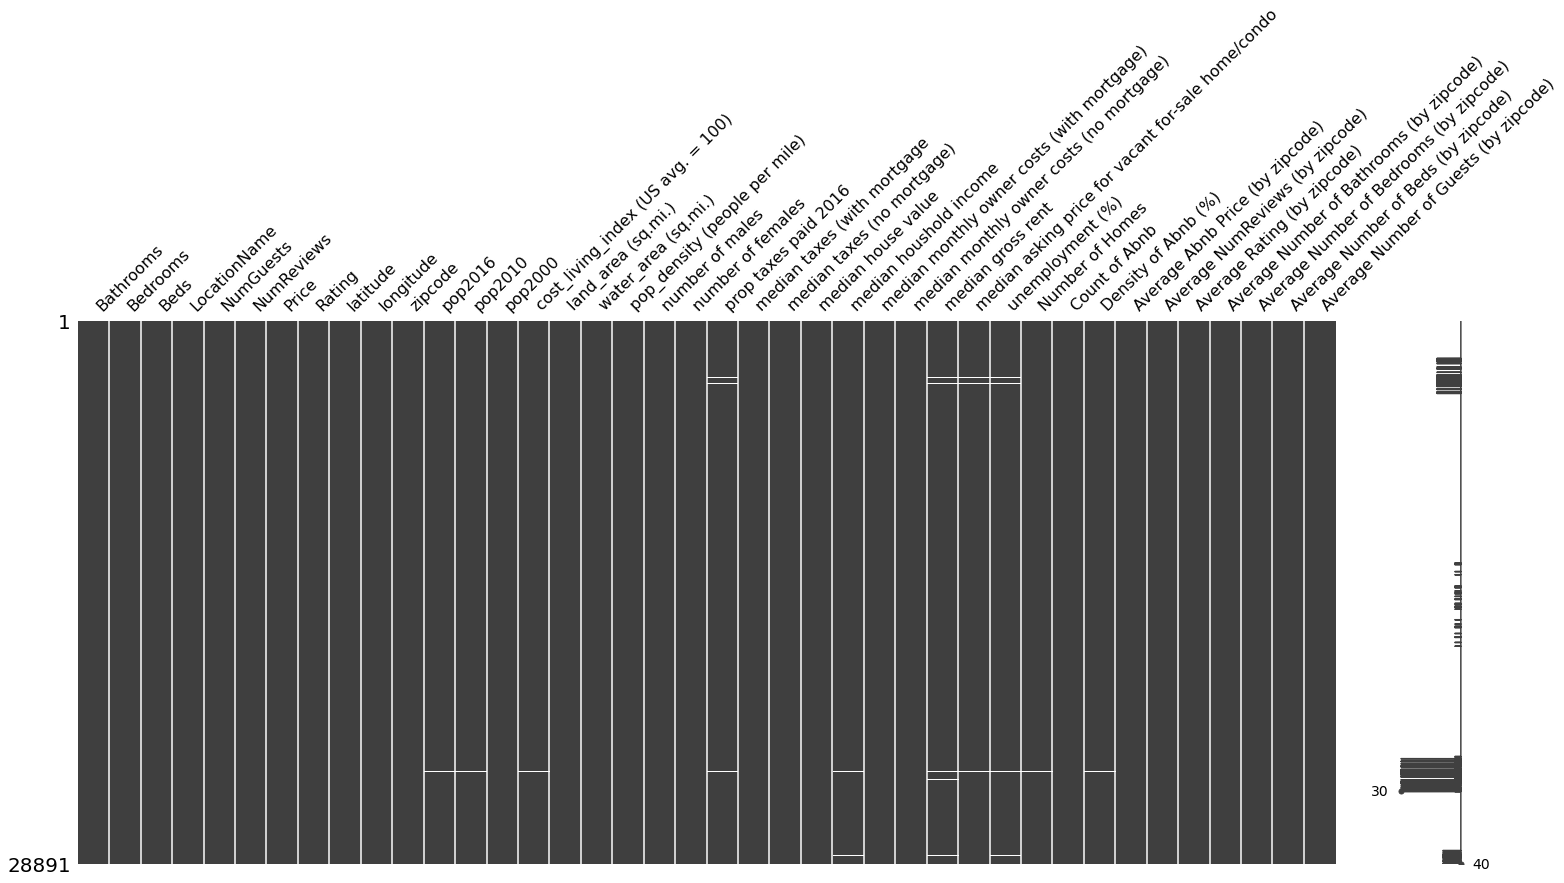

In [21]:
# To make sure everything is working fine.
#visualize missing values as a matrix
msno.matrix(df)

> **Notes on the previous cell** : 

> As we can see there are no missing values in the `Bathrooms` ,`Beds` ,`LocationName` ,`NumGuests` , `NumReviews` and  `price` column columns



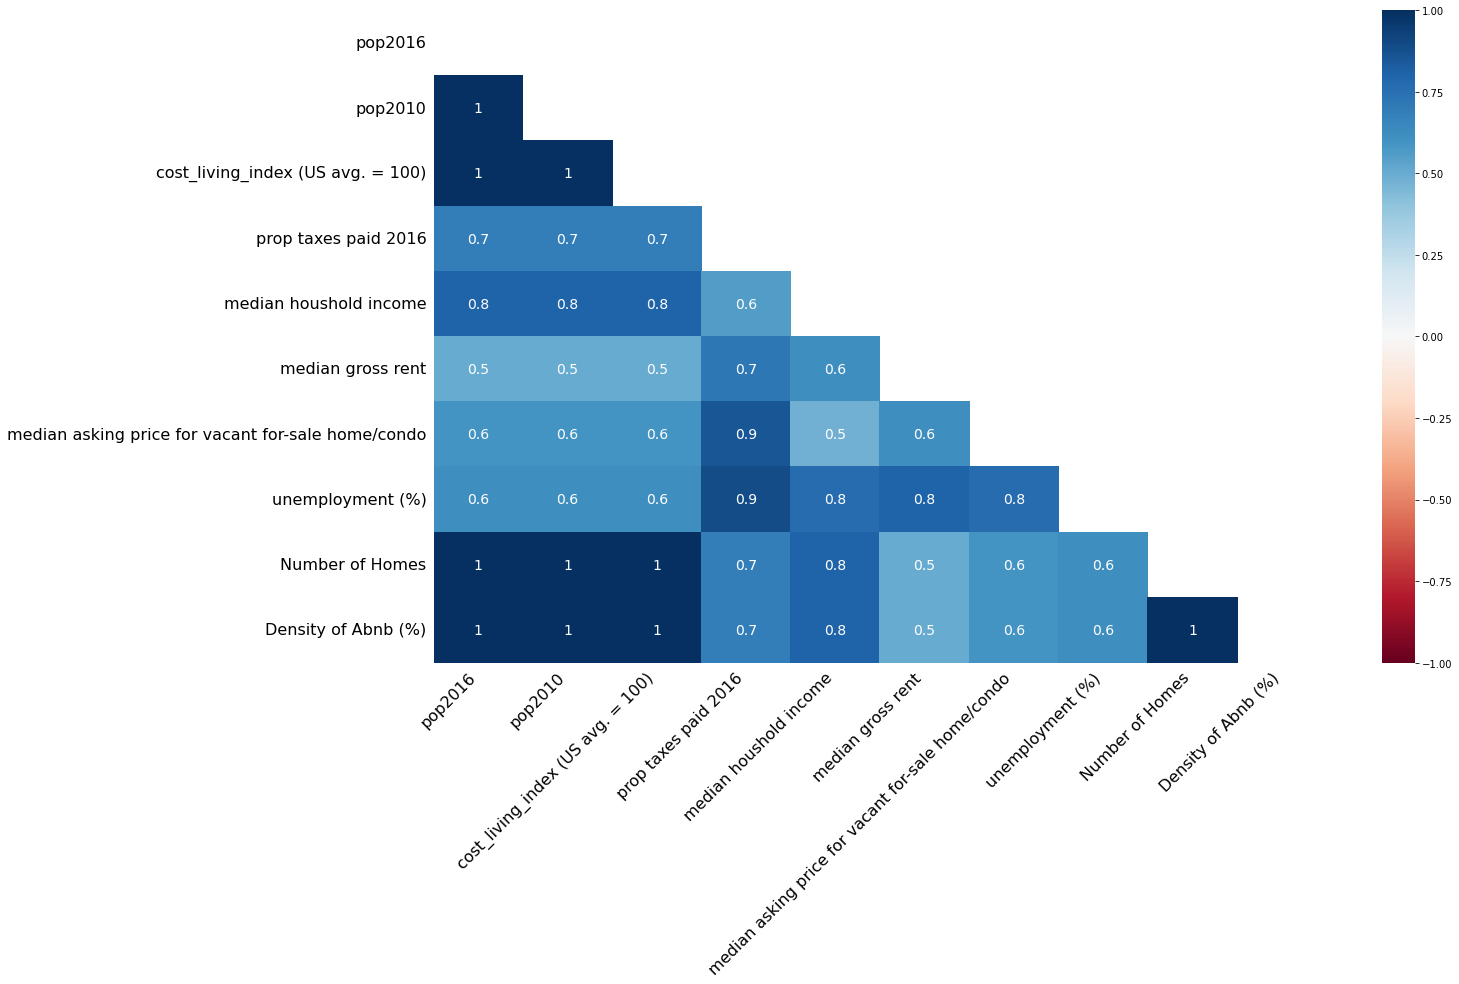

In [22]:
#heapmap for correlation analysis
msno.heatmap(df)

> #### And also `pop2016` , `pop2010` , `cost_living_index (US avg. = 100)` and `Number of Homes` variables often missing together with `Density of Abnb (%)` column . So, let's handle them.

In [23]:
# create a list with columns names .
col_names = ['pop2016','pop2010' , 'cost_living_index (US avg. = 100)','Number of Homes', 'Density of Abnb (%)']

# Fit to data, then transform it.
df[col_names] = imputer.fit_transform(df[col_names])

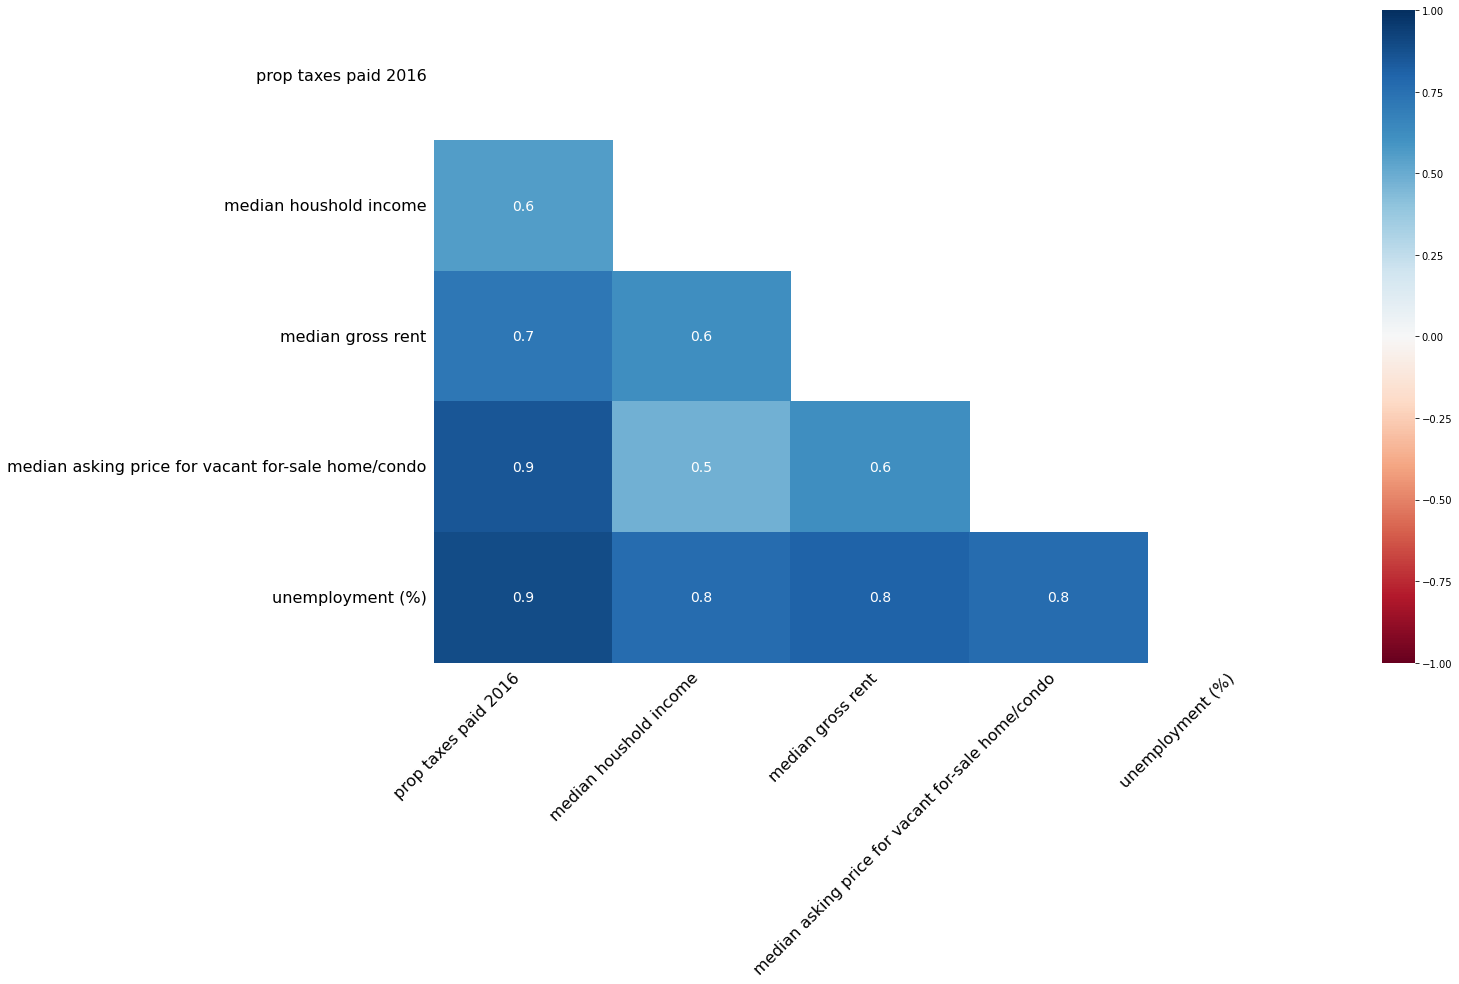

In [24]:
#heapmap for correlation analysis
msno.heatmap(df)

> #### And also `unemployment (%)` , `prop taxes paid 2016` , `median houshold income` and `median gross rent` variables often missing together with `median asking price for vacant for-sale home/condo` column . So, let's handle them.



In [25]:
# create a list with columns names .
col_names = ['unemployment (%)','prop taxes paid 2016' , 'median houshold income','median gross rent', 'median asking price for vacant for-sale home/condo']

# Fit to data, then transform it.
df[col_names] = imputer.fit_transform(df[col_names])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [26]:
# To make sure everything is working fine.
# just call this fun.
ratio_meth()

                                                    Total missing  % missing
Bathrooms                                                       0        0.0
Bedrooms                                                        0        0.0
median taxes (no mortgage)                                      0        0.0
median house value                                              0        0.0
median houshold income                                          0        0.0
median monthly owner costs (with mortgage)                      0        0.0
median monthly owner costs (no mortgage)                        0        0.0
median gross rent                                               0        0.0
median asking price for vacant for-sale home/condo              0        0.0
unemployment (%)                                                0        0.0
Number of Homes                                                 0        0.0
Count of Abnb                                                   0        0.0

> **Notes on the previous cell** : 

> As we can see there are no missing values. So, let's move on to the next task.

# <a>Task 6:</a> 

> Impact on classification performance. Consider one of the above handling method you proposed for this dataset and perform classification task to investigate if your handling method can improve classificaiton performance. 

> **Train-test split:** you can do one split of train and test where `70%` of the data for training and the remaining `30%` for testing. 

> **Classifier :** you can pick any two tranditional binary classifier (e.g., from sklearn)

In [27]:
# TODO for Task 6

# separate the `Rating` column from the rest of the data
y = df['Rating']
X = df
X.drop('Rating', axis=1, inplace=True)
X.head()

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,latitude,longitude,zipcode,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,0.0,1.0,15.0,1.0,5.0,28.0,8144,13255,251,...,49.0,66,282.0,180,130,235,226,232,228,228
1,1.0,0.0,1.0,15.0,1.0,13.0,28.0,8766,13207,253,...,116.0,80,255.0,176,44,161,175,151,91,91
2,2.0,1.0,2.0,15.0,3.0,15.0,90.0,8100,12864,247,...,92.0,127,309.0,234,162,232,212,197,172,172
3,1.0,0.0,1.0,15.0,1.0,301.0,68.0,8351,13230,244,...,72.0,100,293.0,236,181,210,180,198,185,185
4,1.0,0.0,1.0,15.0,1.0,17.0,40.0,8598,12546,246,...,97.0,125,305.0,262,89,199,194,186,188,188


In [28]:
#splite the data into 70% for training to 30% for testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

## <a>XGboost Model

> **Note:** Some algprithms like **XGBoost** can handle missing values without any preprocessing, by supplying relevant parameters.

> ![](https://i.imgur.com/GNlcWoJ.png)

> [source](https://imgur.com/GNlcWoJ)

> ## XGboost hyperparameter:


> *   `n_estimators:` #of gradient boosted trees, Equivalent to no of boosting rounds
*   `max_depth:` max. tree depth
*   `learning_rate:` aka. “eta”
*   `objective:` specify learning task & objective
*   `subsample:` subsample ratio of the training instance.
*   `colsample_bytree:` subsample ratio of columns when constructing each tree
*   `seed:` generate the folds

> [Source](https://xgboost.readthedocs.io/en/latest/python/python_api.html)



In [29]:
%%time
# create an object from our XGBClassifier
xgb = XGBClassifier(max_depth=9, learning_rate=0.2, n_estimators=43,objective = 'binary:logistic', subsample=0.6, colsample_bytree=0.5, seed=1)                  

# fit the model
xgb.fit(X_train, y_train)

# predicting
y_pred = xgb.predict(X_test)

#Calculating classification Report. 
Report_ = classification_report(y_test, y_pred)
print('The Report is : \n', Report_)

The Report is : 
               precision    recall  f1-score   support

           0       0.57      0.32      0.41      2785
           1       0.73      0.89      0.80      5883

    accuracy                           0.71      8668
   macro avg       0.65      0.60      0.61      8668
weighted avg       0.68      0.71      0.68      8668

CPU times: user 2.88 s, sys: 23.7 ms, total: 2.91 s
Wall time: 3 s


## <a>AdaBoost Model

> **AdaBoost** is an ensemble model and is quite different from Bagging. Let's point out the core concepts.



> *   AdaBoost combines a lot of "weak learners"(they are also called stump; a tree with only one node and two leaves) to make classifications.
*   This base model fitting with weak decision trees is an iterative process where each stump is chained one after the other; It cannot run in parallel(a significant drawback of AdaBoost).
*   Some stumps get more say in the final classifications than others: The model use weights that are assigned to each data point/raw indicating their "importance." Sample with higher weights have a higher influence on the total error of the next model and gets more priority. The first stump starts with uniformly distributed weight which means, in the beginning, every datapoint have an equal amount of weights.
*   Each stump is made by taking the previous stump's mistakes into account: After each iteration weights gets re-calculated to take the errors/misclassifications from the last stump into consideration.
*   he final prediction is typically constructed by a weighted vote where weights for each base model depends on their training errors or misclassification rates.



> ![](https://slideplayer.com/slide/9092209/27/images/20/Algorithm+Adaboost+-+Example.jpg)

> [source](https://slideplayer.com/)

In [31]:
%%time
# create an object from our AdaBoostClassifier
Ada_ = AdaBoostClassifier(RandomForestClassifier(n_estimators = 43), algorithm="SAMME", n_estimators=43)

# fit the model
Ada_.fit(X_train, y_train)

# predicting
y_pred = Ada_.predict(X_test)

#Calculating classification Report. 
Report_ = classification_report(y_test, y_pred)
print('The Report is : \n', Report_)

The Report is : 
               precision    recall  f1-score   support

           0       0.57      0.37      0.45      2785
           1       0.75      0.87      0.80      5883

    accuracy                           0.71      8668
   macro avg       0.66      0.62      0.63      8668
weighted avg       0.69      0.71      0.69      8668

CPU times: user 2min 36s, sys: 4.28 s, total: 2min 40s
Wall time: 2min 42s


# <a>Task 7: 
Report your findings through the above experiments (in this markdown cell)

> In this lab we’ve seen how to deal with missing values in our data, There is no single best way to handle missing values. One needs to experiment with different methods and then decide which method is best for a particular problem.

> For continuous features, we usually need to rely on imputation, i.e. filling in the values. When doing imputation, it might still be useful to record whether a feature was imputed or not.

> For imputing values, often a simple approach such as using the mean or median is enough, and should be our baseline.

> If you want to use a more complex approach, the main contenders are **KNNImputer**, which works reasonably well without much tuning on smaller datasets, and **IterativeImputer**, which is quite flexible, but requires specifying a base model (often **RandomForestRegressor**) as well as potentially the number of iterations.

> As usual, there is no ultimate right answer, and apart from visualizations, as we did above, evaluating the final supervised learning method is the best way to access which method is best suited for your problem. If your supervised learning model is flexible enough, and you have enough data, often a simple imputation scheme is enough, as the supervised model can often infer all the necessary information from the data.

> We used two models ` AdaBoost & XGboost ` with two different hyperparameters which we have discussed in detail separately and they both give us a score of `~71%` I believe this lower accuracy is due to the over-fitting that occurred.
I think that because the data isn't clean enough to make the models get higher accuracy.

# **<a>Resources.</a>**

There are a lot of resources, but these are among the most important sources that helped me and I learned from them.

**Note:** The code sources were mentioned to each cell separately.




> [Plot_column_transformer_mixed_types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

>[Iterative-imputation-for-missing-values-in-machine-learning](https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/)

> [Adaboost-with-titanic-dataset](https://www.kaggle.com/code/masumrumi/adaboost-with-titanic-dataset/notebook)

> [Imputation]( https://amueller.github.io/aml/01-ml-workflow/08-imputation.html)

>[Beginner-plotly#Feature-engineering](https://www.kaggle.com/code/cathy64/beginner-plotly#Feature-engineering)

>[Dealing-with-missing-data-in-python](https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/the-problem-with-missing-data?ex=1)


>[How-to-handle-missing-data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4f)





> [Guide-to-handling-missing-values](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python/notebook)


